In [1]:
df<-read.csv('d:/data/ozone/ozone4.csv')
head(df)

Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
41,190,190.0000,7.4,67,5,1,41.00000,0
36,118,118.0000,8.0,72,5,2,36.00000,0
12,149,149.0000,12.6,74,5,3,12.00000,0
18,313,313.0000,11.5,62,5,4,18.00000,0
NA,NA,185.9315,14.3,56,5,5,42.12931,0
28,NA,185.9315,14.9,66,5,6,28.00000,0


In [2]:
library(dplyr)
df<- df %>% select(-Ozone,-Solar.R,-Month,-Day,Ozone2)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 153   5

Solar.R2,Wind,Temp,Ozone2,Result
190.0000,7.4,67,41.00000,0
118.0000,8.0,72,36.00000,0
149.0000,12.6,74,12.00000,0
313.0000,11.5,62,18.00000,0
185.9315,14.3,56,42.12931,0
185.9315,14.9,66,28.00000,0


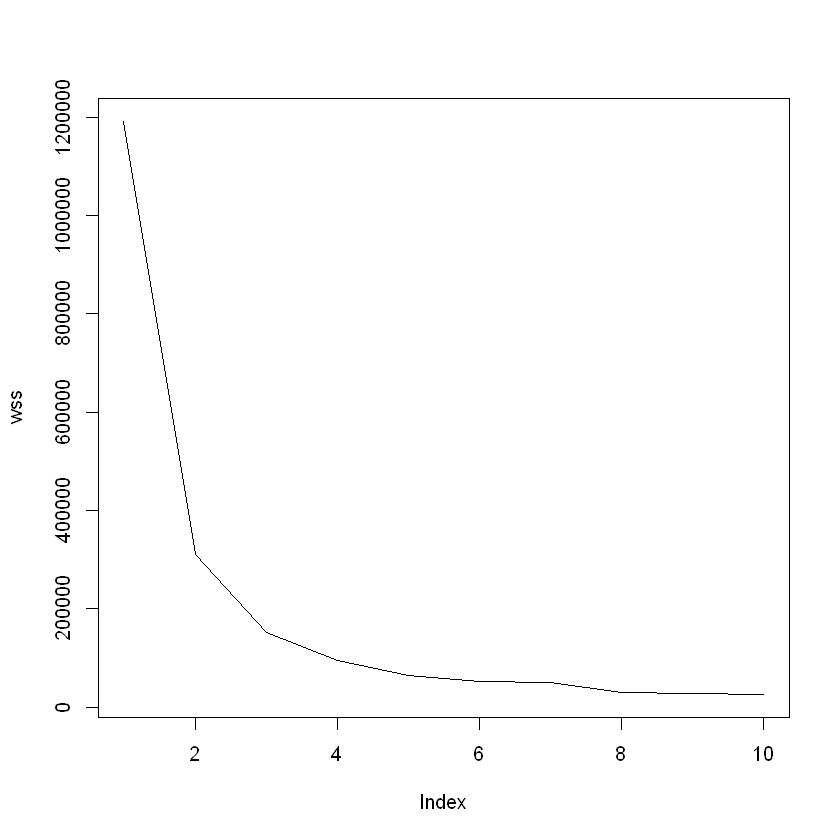

In [3]:
#최적의 k(군집갯수)를 결정하는 과정
result<-NULL
for(k in 1:10){
    # kmeans(데이터셋,군집갯수)
    result[[k]]<-kmeans(df[-4],k)
}
#tot.withinss: The total within-cluster sum of square
#클러스터 내 총 제곱함(작을수록 군집화가 잘 된 상태)
wss<-numeric(10)
for(k in 1:10){
    wss[k]<-result[[k]]$tot.withinss
}
plot(wss,type='l') #옐보우 차트(기울기가 크게 꺾이는 포인트 확인)

In [4]:
result[[2]]$cluster

[1] 2 1 1 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2
 [38] 1 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 1 2 2
 [75] 2 1 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 2
[112] 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1 1 1
[149] 2 1 2 1 2

[1] 0.6304049

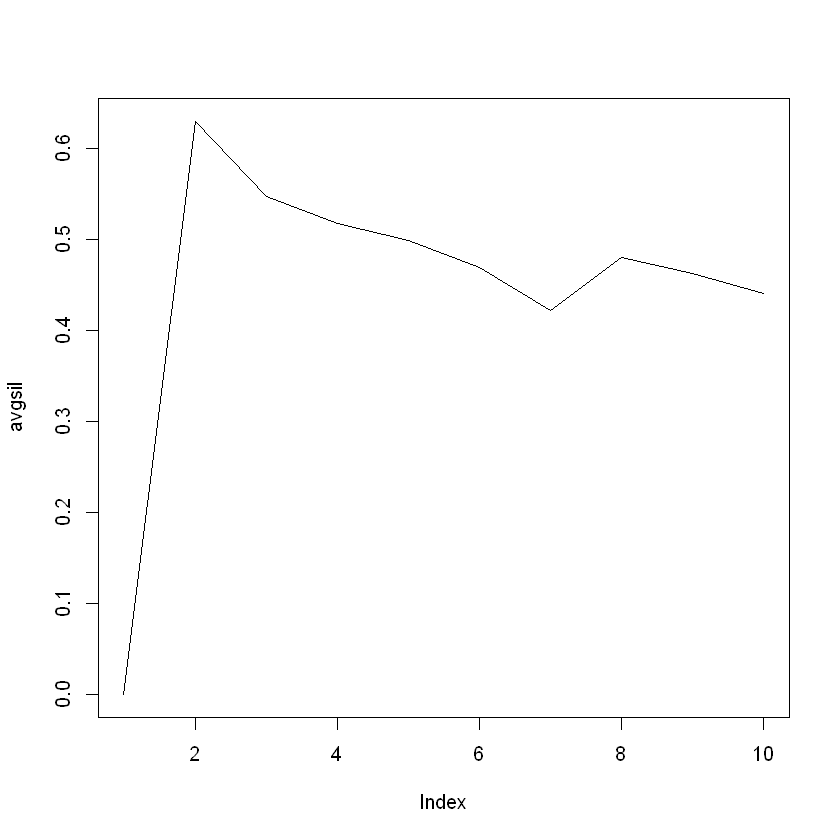

In [5]:
#실루엣 포인트 : 한 클러스터에 속한 데이터들이 다른 클러스터와
# 얼마나 비슷한가를 나타내는 값
library(cluster)
avgsil<-numeric(10)
for(k in 2:10){
    si<-summary(silhouette(result[[k]]$cluster,
                          dist(df[-4])))
    avgsil[k]<-si$avg.width
}
max(avgsil)
plot(avgsil,type='l')
#실루엣 포인트가 최대가 되는 값 확인

In [6]:
#install.packages('factoextra')

Warning message:
"package 'factoextra' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


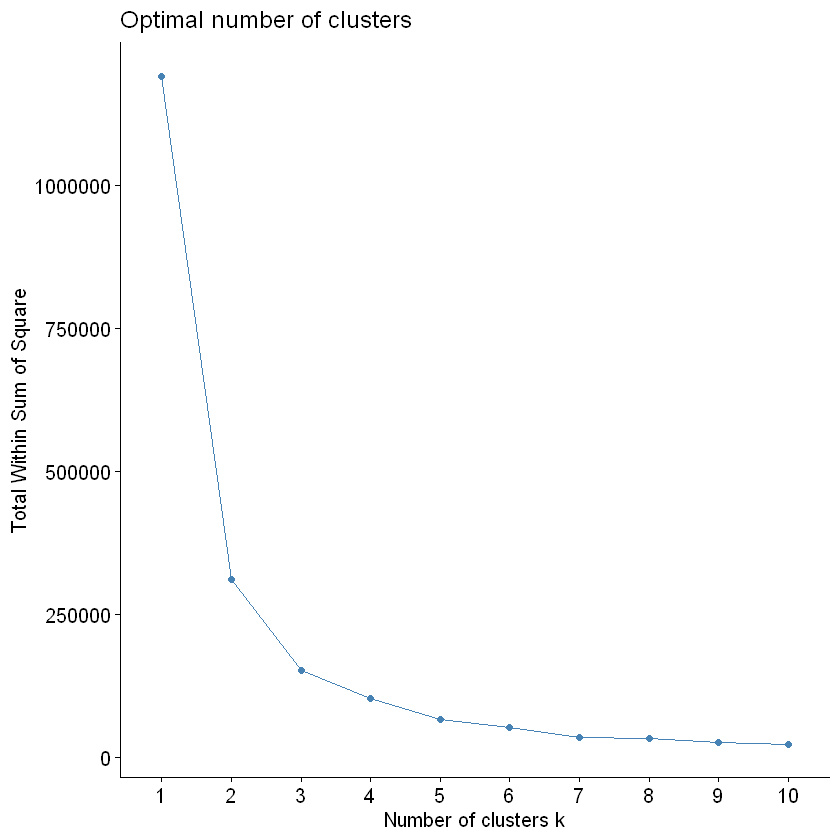

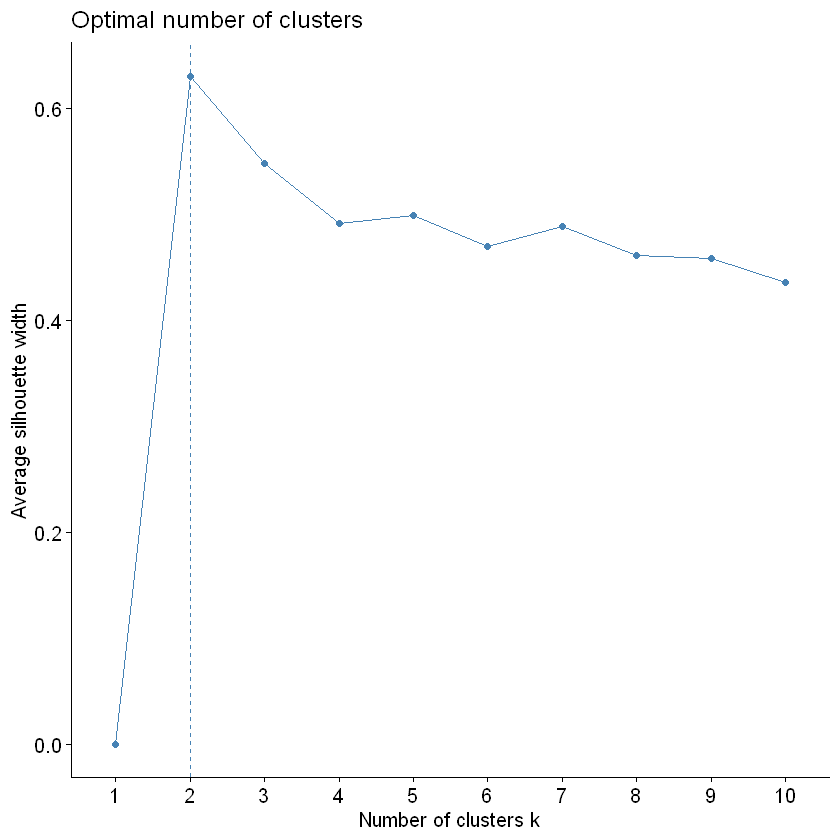

In [7]:
library(factoextra)
#wss(클러스터 내 제곱합)
fviz_nbclust(df[,-4],FUN=kmeans,method='wss')
#실루엣 포인트
fviz_nbclust(df[,-4],FUN=kmeans,method='silhouette')

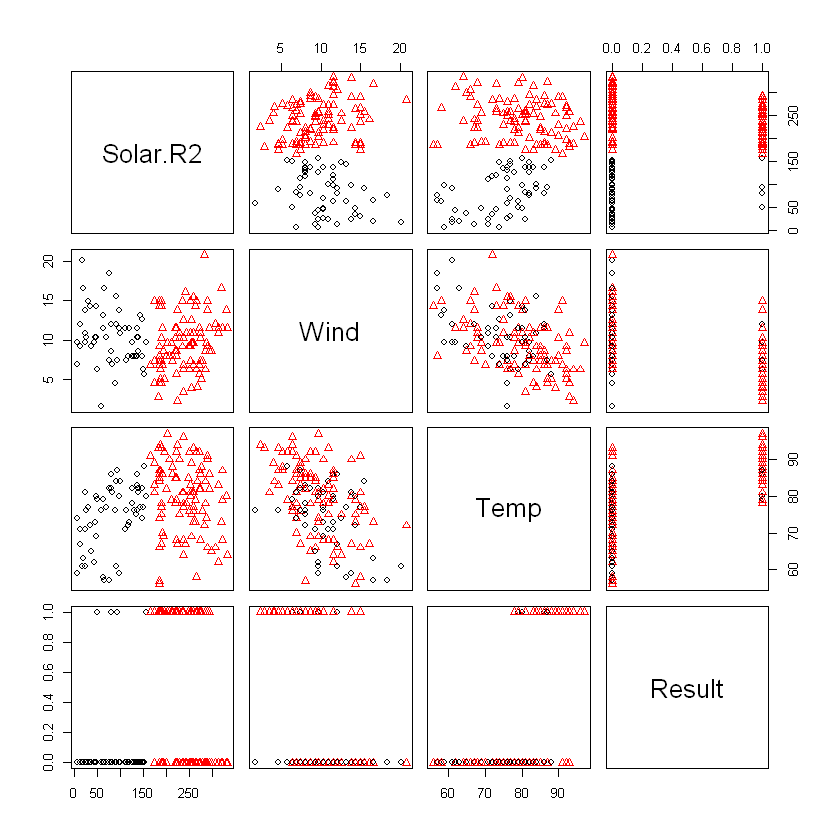

In [8]:
#산점도 행렬
plot(df[,-4],pch=result[[2]]$cluster,col=result[[2]]$cluster)

In [9]:
#최적의 k값으로 만든 kmeans 모형
set.seed(123)
model<-kmeans(df[,-4],center=2) #군집갯수를 2로 설정한 모형
model
model$center #중심좌표

K-means clustering with 2 clusters of sizes 99, 54

Cluster means:
   Solar.R2      Wind     Temp     Result
1 241.94465  9.660606 79.79798 0.40404040
2  83.24074 10.501852 74.37037 0.07407407

Clustering vector:
  [1] 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1
 [38] 2 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1
 [75] 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 1
[112] 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 2 2 2
[149] 1 2 1 2 1

Within cluster sum of squares by cluster:
[1] 191400.1 119042.1
 (between_SS / total_SS =  73.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Solar.R2,Wind,Temp,Result
241.94465,9.660606,79.79798,0.40404040
83.24074,10.501852,74.37037,0.07407407


In [10]:
head(df)
model$cluster

Solar.R2,Wind,Temp,Ozone2,Result
190.0000,7.4,67,41.00000,0
118.0000,8.0,72,36.00000,0
149.0000,12.6,74,12.00000,0
313.0000,11.5,62,18.00000,0
185.9315,14.3,56,42.12931,0
185.9315,14.9,66,28.00000,0


[1] 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1
 [38] 2 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1
 [75] 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 1
[112] 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 2 2 2
[149] 1 2 1 2 1

In [11]:
#모형에서 예측한 군집번호를 데이터프레임에 추가
df$cluster<-as.factor(model$cluster - 1)

In [12]:
df

Solar.R2,Wind,Temp,Ozone2,Result,cluster
190.0000,7.4,67,41.00000,0,0
118.0000,8.0,72,36.00000,0,1
149.0000,12.6,74,12.00000,0,1
313.0000,11.5,62,18.00000,0,0
185.9315,14.3,56,42.12931,0,0
185.9315,14.9,66,28.00000,0,0
299.0000,8.6,65,23.00000,0,0
99.0000,13.8,59,19.00000,0,1
19.0000,20.1,61,8.00000,0,1
194.0000,8.6,69,42.12931,0,0


In [13]:
head(df)
convert<-function(i){
    if(i==0){
        return("1")
    }else if(i==1){
        return("0")
    }
}
#각 데이터샘플에 convert 함수를 적용함
result<-sapply(df$cluster,convert)
#head(result)

Solar.R2,Wind,Temp,Ozone2,Result,cluster
190.0000,7.4,67,41.00000,0,0
118.0000,8.0,72,36.00000,0,1
149.0000,12.6,74,12.00000,0,1
313.0000,11.5,62,18.00000,0,0
185.9315,14.3,56,42.12931,0,0
185.9315,14.9,66,28.00000,0,0


In [14]:
#예측정확도
table(df$Result,result)
mean(result==df$Result)

   result
     0  1
  0 50 59
  1  4 40

[1] 0.5882353